# Ordinary Least Squared (OLS) in Statsmodels

## Introduction

So far, you learned how to create code for running linear regression experiments along with checking their goodness of fit. Python provides us with many libraries to automate this process and to enhance the efficiency of computation. In this lesson, you'll be introduced to the `statsmodels` library to run OLS regression experiments. 

## Objectives

You will be able to:
* Perform a linear regression using statsmodels
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Determine if a particular set of data exhibits the assumptions of linear regression

## What is Statsmodels?

Statsmodels is a powerful Python package for many types of statistical analyses. If you installed Python via Anaconda, then the module was installed at the same time. In statistics, ordinary least square (OLS) regression is a method for estimating the unknown parameters in a linear regression model. It minimizes the sum of squared vertical distances between the observed values and the values predicted by the linear approximation. The OLS method in statsmodels is widely used for regression experiments in all fields of study.

![](images/sm1.png)


For simple linear regression, Statsmodels builds a regression model where $y$ is a $(n * 1)$-vector and $x$ is a $(n * 1)$-vector. The method returns a vector of size $n$, where $n$ is the number of observations. 

## Importing Necessary Libraries
The next code cell shows you how to import statsmodels OLS method into your working Python environment. You'll also import Pandas for data handling and Matplotlib for visualizations. 

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Load the data - Initial Checks
Let's load a simple dataset for the purpose of understanding the process first. You can use the weight-height dataset used before. Let's try to identify the relationship between height as independent and weight and dependent variables. You will also use Pandas visualizations to check for your linearity assumption. 

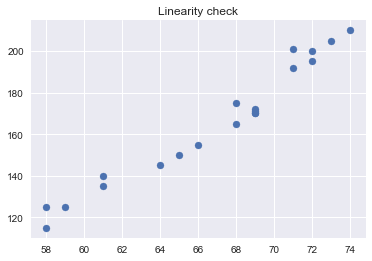

In [2]:
df = pd.read_csv('heightWeight.csv')
plt.scatter(df.height, df.weight)
plt.title("Linearity check")
plt.show()

Next, let's look at the distributions of the dependent and independent variables. 

**NOTE**: Observing normality here does _NOT_ necessarily mean your normality assumption is fulfilled! You just generally want to check out the distribution of your variables before starting to build a model. You'll verify the normality assumption later by checking the distribution of the residuals **after** building the model.

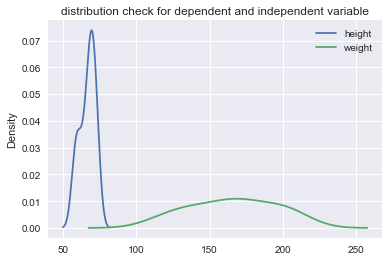

In [3]:
df.plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()

## Regression formula 

Looks like you're good for the linearity assumption, and additionally, the distributions for height and weight look reasonable (and even pretty normal!). Now, let's run the regression. Statsmodels allows users to fit statistical models using R-style **formulas**. The formula framework is quite powerful and for simple regression it is written using a **~** as `Y ~ X`. 

The formula gives instruction for a general structure for a regression call. For a statsmodels ols calls, you'll need a Pandas dataframe with column names that you will add to your formula. 

In [4]:
f = 'weight~height'

You can now pass the formula with variable names to `ols` along with `fit()` to fit a linear model to given variables. 

In [5]:
model = ols(formula=f, data=df).fit()

Great, that was fast (remember we have only 20 observations). Now, you can go ahead and inspect your fitted model in many ways. First, let's get a summary of what the model contains using `model.summary()`

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           1.35e-13
Time:                        13:57:26   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wow, that's a lot of information. Statsmodels performs a ton of tests and calculates measures to identify goodness of fit. 

* You can find the R-Squared, which is 0.95 i.e. the data are very linearly related
* You can also look at the coefficients of the model for intercept and slope (next to "height")
* Kurtosis and Skew values are shown here
* A lot of significance testing is being done here


**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit: 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

The second table shows the coefficient report: 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

The third table shows information about the residuals, autocorrelation, and multicollinearity: 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: Provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

The interpretation of some of these measures will be explained in the next lessons. For others, you'll get a better insight into them in the lessons on statistics. 


## Visualize error terms

You can also plot some visualizations to check the regression assumptions with respect to the error terms. You'll use `sm.graphics.plot_regress_exog()` for some built-in visualization capabilities of statsmodels. Here is how to do it: 

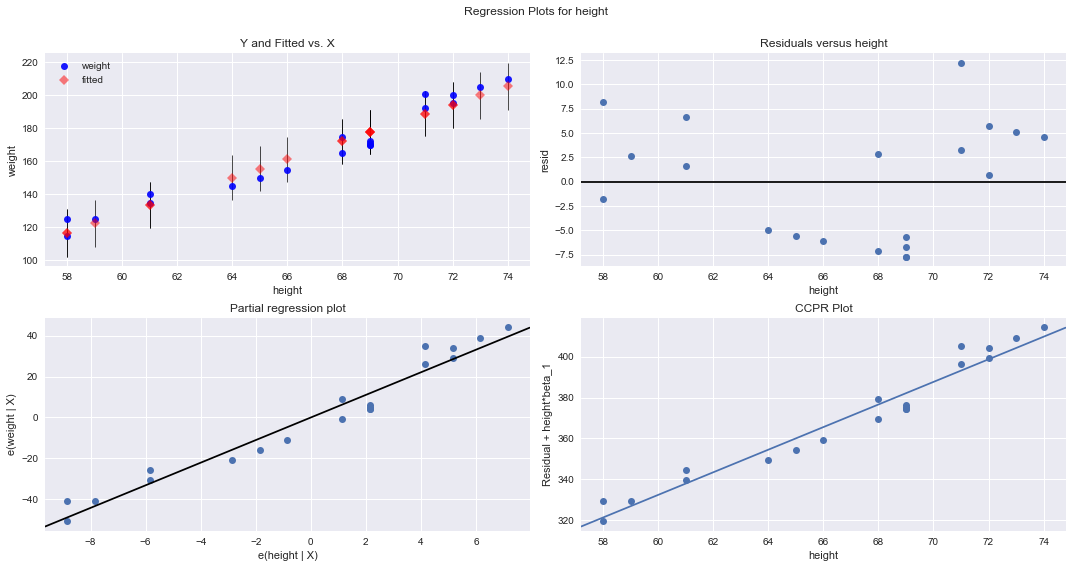

In [7]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

For the four graphs we see above:

* The **Y and Fitted vs. X** graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

* The **Residuals versus height** graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

* The **Component and Component Plus Residual (CCPR)** plot is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.

## Q-Q Plots
To check for the normality assumption, you can obtain error terms (residuals) from the model and draw Q-Q Plot against a standard normal distribution as shown below. While the residuals do not seem to match up perfectly with the red line, there seem to be no super clear deviations from the red line. So you can assume that you're OK for the normality assumption.

C:\Users\wblak\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


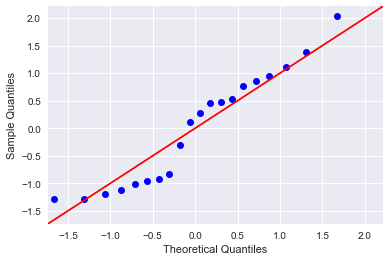

In [8]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

So you now know how to run an OLS simple regression experiment in Statsmodels. In the next lesson, you'll learn how to interpret the diagnostics better and how to relate the outcome to the research question. 

## Summary

In this lesson, you learned how to run a simple regression experiment in Statsmodels. You learned about the format and conventions for running such an experiment. You also looked at regression diagnostics and how to interpret them, plus some visualizations to check for your regression assumptions. 